<a href="https://colab.research.google.com/github/mpozzini/CS167-Project-2/blob/main/Project_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code
Your project should address the categories below. 

## Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, and what you're trying to predict. What are the possible uses for this kind of machine learning model?



# Input Pipeline (sklearn):

In [2]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/datasets/IMDB_dataset.csv')
data.head()

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

In [3]:
## Use cells here to explore the data:

# Number of samples
index = data.index
rows = len(index)
print(rows)

50000


In [4]:
# Number of classes of the target variable
target_var = data['sentiment'].unique()
print(len(target_var))

2


In [5]:
# Number of words per sample
data['number of words in review'] = data['review'].str.split().str.len()
data.head()

,review,sentiment,number of words in review
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


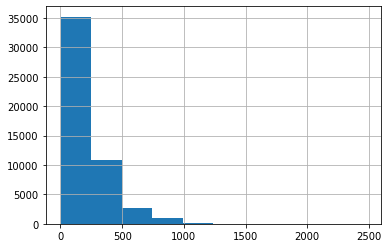

In [6]:
# Distribution of sample length
data['number of words in review'].hist()

In [7]:
# Something else:
# Calculate the percentage of negative and positive reviews from the dataset
negative_review = data[data['sentiment'] == 'negative']
index_neg = negative_review.index
rows_neg = len(index_neg)
print((((rows_neg/rows)*100)), '% of the reviews are negative')
positive_review = data[data['sentiment'] == 'positive']
index_pos = positive_review.index
rows_pos = len(index_pos)
print((((rows_pos/rows)*100)), '% of the reviews are positive')

50.0 % of the reviews are negative
50.0 % of the reviews are positive


## Data Preparation

Explain your data preparation. What did you have to do to get your data in shape for your experiments - word embeddings, stop words, vectorization, tokeniztion, etc.

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [8]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [9]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [10]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [11]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [12]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 50 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 50)
#find the right 50 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.


## Metrics 
What metrics will you use to evaluate your model? Why are these metrics the best for your model? (Hint, this should be more than 'accuracy')

## Model Planning and Execution
Identify which learning algorithms you will try and which important parameters you will tune for each one.

accuracy: 0.7104


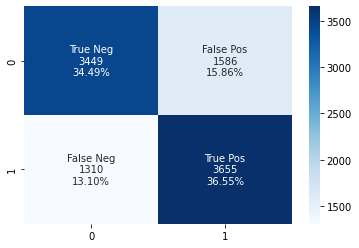

In [14]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
clf = SVC()
clf.fit(train_data_vectors, train_sln)
clf_pred = clf.predict(test_data_vectors)

print('accuracy:', accuracy_score(test_sln, clf_pred))

# Got help from this website for this code: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(test_sln, clf_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/numpy.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = numpy.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');


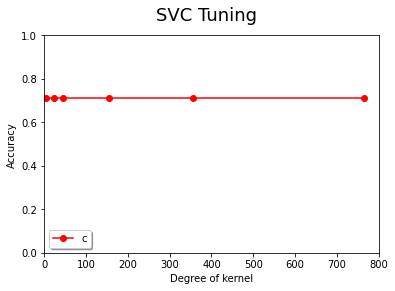

In [15]:
# SVC Graph and Tuning
cl_vals = [4, 23, 45, 155, 356, 765]
clf_accuracy = []

for cl in cl_vals:
  clf = SVC(degree = cl)
  clf.fit(train_data_vectors, train_sln)
  clf_pred = clf.predict(test_data_vectors)
  clf_curr_accuracy = accuracy_score(test_sln, clf_pred)
  clf_accuracy.append(clf_curr_accuracy)

plt.suptitle('SVC Tuning', fontsize = 18)
plt.xlabel('Degree of kernel')
plt.ylabel('Accuracy')
plt.plot(cl_vals, clf_accuracy, 'ro-', label='c')
plt.legend(loc='lower left', shadow= True)
plt.axis([0,800,0,1])
plt.show()

accuracy: 0.5462


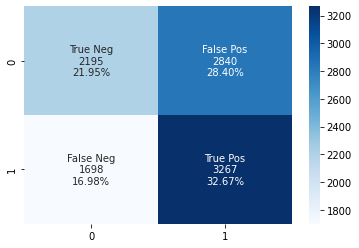

In [20]:
# Principal Component Analysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

extractor = PCA(n_components=2, whiten=True)
extractor.fit(train_data_vectors)
train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)
pca = SVC(random_state = 35)
pca.fit(train_transformed, train_sln)
pca_pred = pca.predict(test_transformed)

print('accuracy:', accuracy_score(test_sln, pca_pred))

# Got help from this website for this code: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(test_sln, pca_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/numpy.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = numpy.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');


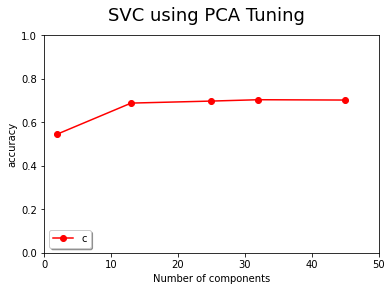

In [23]:
# PCA Graph and Tuning
ca_vals = [2, 13, 25, 32, 45]
pca_accuracy = []

for ca in ca_vals:
  extractor = PCA(n_components=ca, whiten=True)
  extractor.fit(train_data_vectors)
  train_transformed = extractor.transform(train_data_vectors)
  test_transformed = extractor.transform(test_data_vectors)
  pca = SVC(random_state = 35)
  pca.fit(train_transformed, train_sln)
  pca_pred = pca.predict(test_transformed)
  pca_curr_accuracy = accuracy_score(test_sln, pca_pred)
  pca_accuracy.append(pca_curr_accuracy)

plt.suptitle('SVC using PCA Tuning', fontsize = 18)
plt.xlabel('Number of components')
plt.ylabel('accuracy')
plt.plot(ca_vals, pca_accuracy, 'ro-', label='c')
plt.legend(loc='lower left', shadow= True)
plt.axis([0,50,0,1])
plt.show()

accuracy: 0.6493


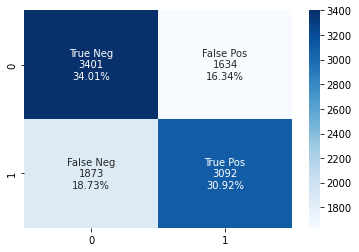

In [13]:
# Perceptron
from sklearn.linear_model import Perceptron
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
warnings.filterwarnings('ignore')

perc = Perceptron()
perc.fit(train_data_vectors, train_sln)
perc_pred = perc.predict(test_data_vectors)

print('accuracy:', accuracy_score(test_sln, perc_pred))

# Got help from this website for this code: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(test_sln, perc_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/numpy.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = numpy.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');


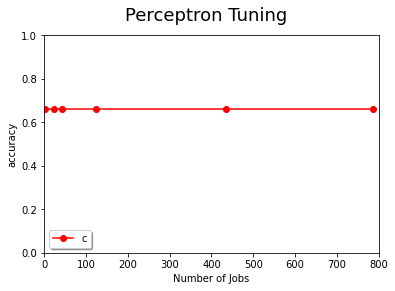

In [17]:
# Perceptron Graph and Tuning
pe_vals = [3, 23, 43, 123, 435, 786]
perc_accuracy = []

for pe in pe_vals:
  perc = Perceptron(random_state = 41, n_jobs = pe)
  perc.fit(train_data_vectors, train_sln)
  perc_pred = perc.predict(test_data_vectors)
  perc_curr_accuracy = accuracy_score(test_sln, perc_pred)
  perc_accuracy.append(perc_curr_accuracy)

plt.suptitle('Perceptron Tuning', fontsize = 18)
plt.xlabel('Number of Jobs')
plt.ylabel('accuracy')
plt.plot(pe_vals, perc_accuracy, 'ro-', label='c')
plt.legend(loc='lower left', shadow= True)
plt.axis([0,800,0,1])
plt.show()

accuracy: 0.6715


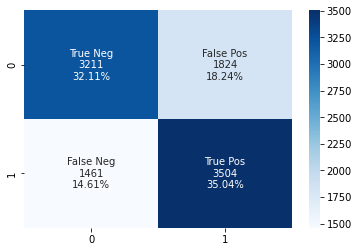

In [18]:
# Multilayer Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

mlp = MLPClassifier(random_state = 0, hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_vectors, train_sln)
mlp_pred = mlp.predict(test_data_vectors)

print('accuracy:', accuracy_score(test_sln, mlp_pred))

# Got help from this website for this code: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(test_sln, mlp_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/numpy.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = numpy.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');


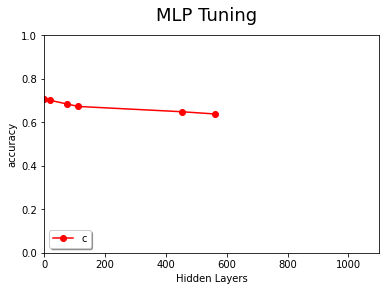

In [19]:
# MLP Graph and Tuning
mp_vals = [1, 20, 76, 113, 452, 560]
MLP_accuracy = []

for mp in mp_vals:
  mlp = MLPClassifier(random_state = 0, hidden_layer_sizes = (mp), max_iter = 800)
  mlp.fit(train_data_vectors, train_sln)
  mlp_pred = mlp.predict(test_data_vectors)
  mlp_curr_accuracy = accuracy_score(test_sln, mlp_pred)
  MLP_accuracy.append(mlp_curr_accuracy)

plt.suptitle('MLP Tuning', fontsize = 18)
plt.xlabel('Hidden Layers')
plt.ylabel('accuracy')
plt.plot(mp_vals, MLP_accuracy, 'ro-', label='c')
plt.legend(loc='lower left', shadow= True)
plt.axis([0,1100,0,1])
plt.show()

## Bumps in the Road
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?

## Results
After you conduct your learning experiment, summarize the results you got. Include visualizations as appropriate.

## Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.